In [9]:
### Import data ###
import pandas as pd 
df = pd.read_excel("HGSOC_Biomarkers.xlsx") #reads excel file 
df["Diagnosis"] = df["Diagnosis"].map({0: "Healthy", 1: "Disease"}) #maps the numerical diagnosis value to healthy and disease catergories
df.head()

,SampleID,Diagnosis,EEF1G,BCAM,TAGLN2,MSLN,APOA1,B2M,TF,TTR,MUC16
0,HC_M195,Healthy,0.0,0.0,17.096063,16.387693,21.190335,19.511420,23.598631,21.835301,0.0
1,HC_M197,Healthy,0.0,0.0,16.137788,0.000000,20.578048,18.457454,24.003077,22.461478,0.0
2,HC_M198,Healthy,0.0,0.0,16.727460,0.000000,20.491186,19.218704,22.115501,23.044142,0.0
3,HC_M203,Healthy,0.0,0.0,16.115866,17.578963,21.614149,18.430203,21.636963,22.762821,0.0
4,HC_M207,Healthy,0.0,0.0,16.059741,16.531347,20.489713,18.620959,20.821322,22.619781,0.0


In [10]:
### Converting dataframe into long format ###
proteins = ["EEF1G", "BCAM", "TAGLN2", "MSLN", "APOA1", "B2M", "TF", "TTR", "MUC16"] #all biomarkers tested
long_df = df.melt(
    id_vars="Diagnosis",
    value_vars=proteins,
    var_name="Protein",
    value_name="Abundance"
)

long_df.head()

,Diagnosis,Protein,Abundance
0,Healthy,EEF1G,0.0
1,Healthy,EEF1G,0.0
2,Healthy,EEF1G,0.0
3,Healthy,EEF1G,0.0
4,Healthy,EEF1G,0.0


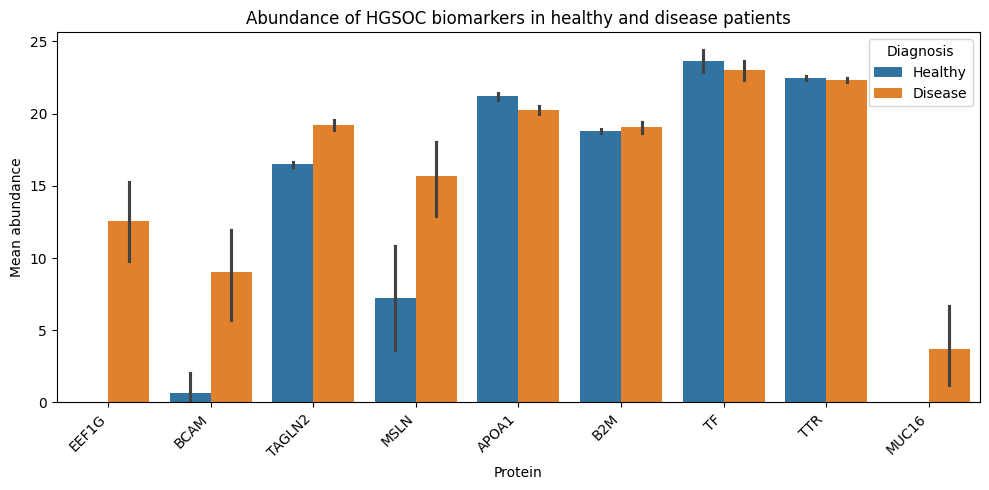

In [11]:
### Plotting bar chart of protien abundance for the "healthy" and "disease" diagnosis groups ###
import seaborn as sns
import matplotlib.pyplot as plt

# Color mapping
palette = {"Healthy": "#2ca02c",  # blue 
           "Disease": "#6a3d9a"}  # orange

# plotting barchart 
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=long_df,
    x="Protein",
    y="Abundance",
    hue="Diagnosis",
    estimator="mean",
    errorbar="ci", # 95% CI 
    dodge=True #places healthy and disease bars next to each other 
)
# Setting graph and axis titles 
ax.set_xlabel("Protein")
ax.set_ylabel("Mean abundance")
ax.set_title("Abundance of HGSOC biomarkers in healthy and disease patients")
ax.legend(title="Diagnosis", loc="best")
ax.grid(False) 
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


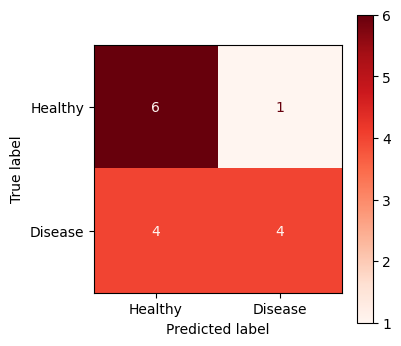

AUC: 0.8571428571428572

=== Test Metrics ===
Accuracy : 0.6667
Precision: 0.8000
Recall   : 0.5000
F1-score : 0.6154
ROC AUC  : 0.8571


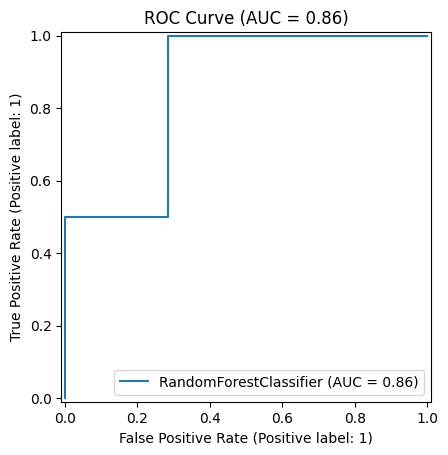

In [17]:
### Building random forest model for panel A ### 
# Panel A biomarkers are the biomarkers used in the FDA approved OVA1 test used to detect ovarian cancer 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define Y 
y = df["Diagnosis"].map({"Healthy": 0, "Disease": 1})

# Define panel A biomarkers 
panel_A = ["APOA1", "B2M", "TF", "TTR", "MUC16"]
X = df[panel_A]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Model will be trained on 70% of the dataset and be tested on the remaining 30% 

# Build Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Disease"])
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap="Reds", colorbar=True)
ax.grid(False)  
plt.show()

# ROC Curve and AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)
roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
roc_disp.ax_.set_title(f"ROC Curve (AUC = {auc:.2f})")

# Core Classification Metrics
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n=== Test Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")


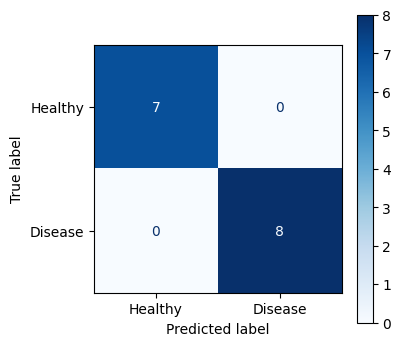

AUC: 1.0

=== Test Metrics ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC AUC  : 1.0000


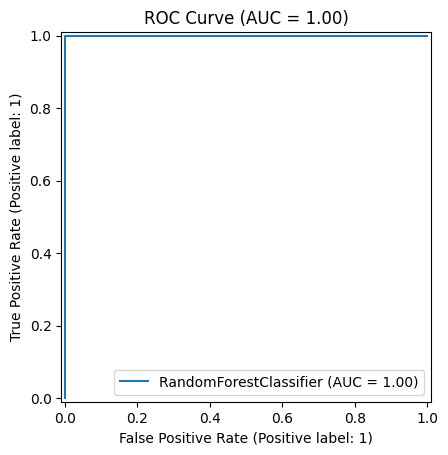

In [16]:
### Building random forest model for panel B ### 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define Y 
y = df["Diagnosis"].map({"Healthy": 0, "Disease": 1})

# Define panel B biomarkers 
panel_B = ["EEF1G", "BCAM", "TAGLN2", "MSLN"]
X = df[panel_B]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build Random Forest
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Disease"])
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.grid(False)  
plt.show()


from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Compute AUC
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

# Plot ROC curve
roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
roc_disp.ax_.set_title(f"ROC Curve (AUC = {auc:.2f})")


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Probabilities for AUC
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("\n=== Test Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")

